In [32]:
# Python program to print all heading tags
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment
import re

# scraping a wikipedia article
url_link = 'https://www.wweek.com'
request = requests.get(url_link)
regex = re.compile('[^a-zA-Z]')

Soup = BeautifulSoup(request.text, 'lxml')
tag_words =[]
regData =[]
# creating a list of all common heading tags
heading_tags = ["h1", "h2", "h3"]
for tags in Soup.find_all(heading_tags):
    tag_words.append(tags.text.strip())
    list2 = [x.replace('\n', '') for x in tag_words]
    
list2

# regex = re.compile('[^a-zA-Z]')
# cleanData = []
# for i in list2:
#     cleanData.append(regex.sub(' ', i))
# cleanData


['Portland Braces for Its Coldest Morning Since 2014',
 'BendFilm and OUT Central Oregon Announce Festival Celebrating LGBTQ+ Films and Filmmakers in the Region',
 'A Miami Company Had Big Plans for Portland’s Fast Food. It’s Struggling to Deliver.',
 'Get Portland stories straight to your inbox.',
 'What We’re Cooking This Week: Oyster Pan Roast With Fennel',
 'Want to Get High Without Hunger Pains? Try One of These Appetite-Suppressing Strains.',
 'Longtime Portland Chef and Social Media Standout Ricky Bella Now Helms the Kitchen at Palomar',
 'Where to Eat This Week',
 'Where to Drink This Week',
 'What to Do in Portland This Week (Dec. 21-27, 2022)',
 'Bennett Campbell Ferguson’s 10 Favorite Movies of 2022',
 'The 2022  CSP Movie Awards',
 'Your Weekly Roundup of Movies: “Babylon” and “Avatar: The Way of Water” are Exhilarating and Astounding',
 'Get Your Reps In: “GoldenEye” Remains Pierce Brosnan’s Best Bond Film',
 'See More Print Editions Here',
 'Emails Show DOJ Warned Brown H

In [33]:
textblob_sentiment=[]
for s in list2:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [34]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [35]:
df_textblob

,Sentence,Polarity,Subjectivity
0,Portland Braces for Its Coldest Morning Since ...,0.000000,0.000000
1,BendFilm and OUT Central Oregon Announce Festi...,0.000000,0.250000
2,A Miami Company Had Big Plans for Portland’s F...,0.100000,0.350000
3,Get Portland stories straight to your inbox.,0.200000,0.400000
4,What We’re Cooking This Week: Oyster Pan Roast...,0.000000,0.000000
5,Want to Get High Without Hunger Pains? Try One...,0.160000,0.540000
6,Longtime Portland Chef and Social Media Stando...,0.033333,0.066667
7,Where to Eat This Week,0.000000,0.000000
8,Where to Drink This Week,0.000000,0.000000
9,"What to Do in Portland This Week (Dec. 21-27, ...",0.000000,0.000000


In [36]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      21 non-null     object 
 1   Polarity      21 non-null     float64
 2   Subjectivity  21 non-null     float64
dtypes: float64(2), object(1)
memory usage: 632.0+ bytes


Text(0.5, 6.79999999999999, 'Sentence Polarity (Textblob)')

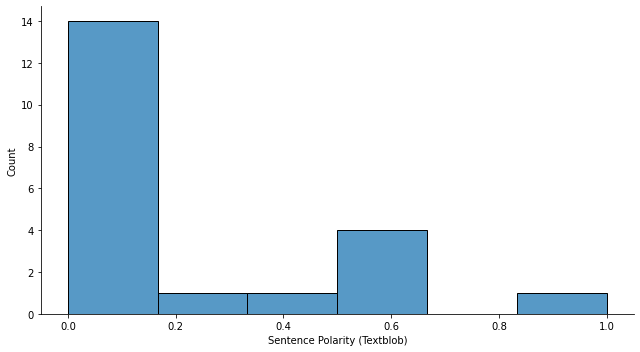

In [37]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 6.79999999999999, 'Sentence Subjectivity (Textblob)')

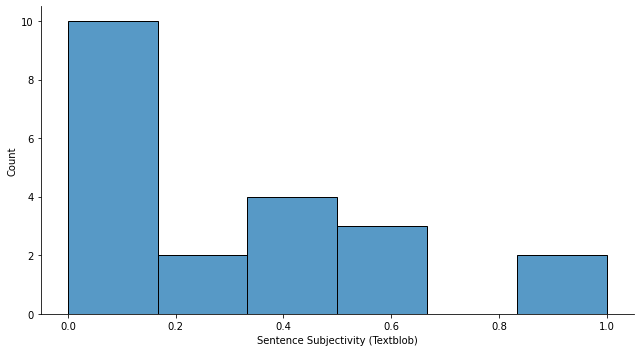

In [38]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [39]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
 

# converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not
filtered_sentence = [w for w in t_data if not w in stop_words]
#with no lower case conversion

filtered_sentence = []
 
for w in t_data:
    if w not in stop_words:
        filtered_sentence.append(w)
new_list=[x for x in filtered_sentence if len(x)>1]

NameError: name 't_data' is not defined

In [40]:
import nltk
import matplotlib.pyplot as plt


def plotfreq(x, title=""):
    flat =[]
    for i in x:
        flat += i
    f = nltk.FreqDist(x)
    
    plt.figure(figsize=(20,20))
    plt.title(title)
    f.plot()

In [41]:
import re

regex = re.compile('[^a-zA-Z]')
cleanData = []
for i in new_list:
    cleanData.append(regex.sub('', i))
    while '' in cleanData:
        cleanData.remove('') 
    

NameError: name 'new_list' is not defined

In [42]:
cleanData

[]

In [43]:
from collections import Counter
my_counter = Counter(cleanData)
print(my_counter)

Counter()


In [44]:
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
stem_tokens = []
for t in cleanData:
    lemma = ls.lemmatize(t) 
    stem_tokens.append(lemma)

In [45]:
from collections import Counter
my_counter = Counter(stem_tokens)
print(my_counter)

Counter()


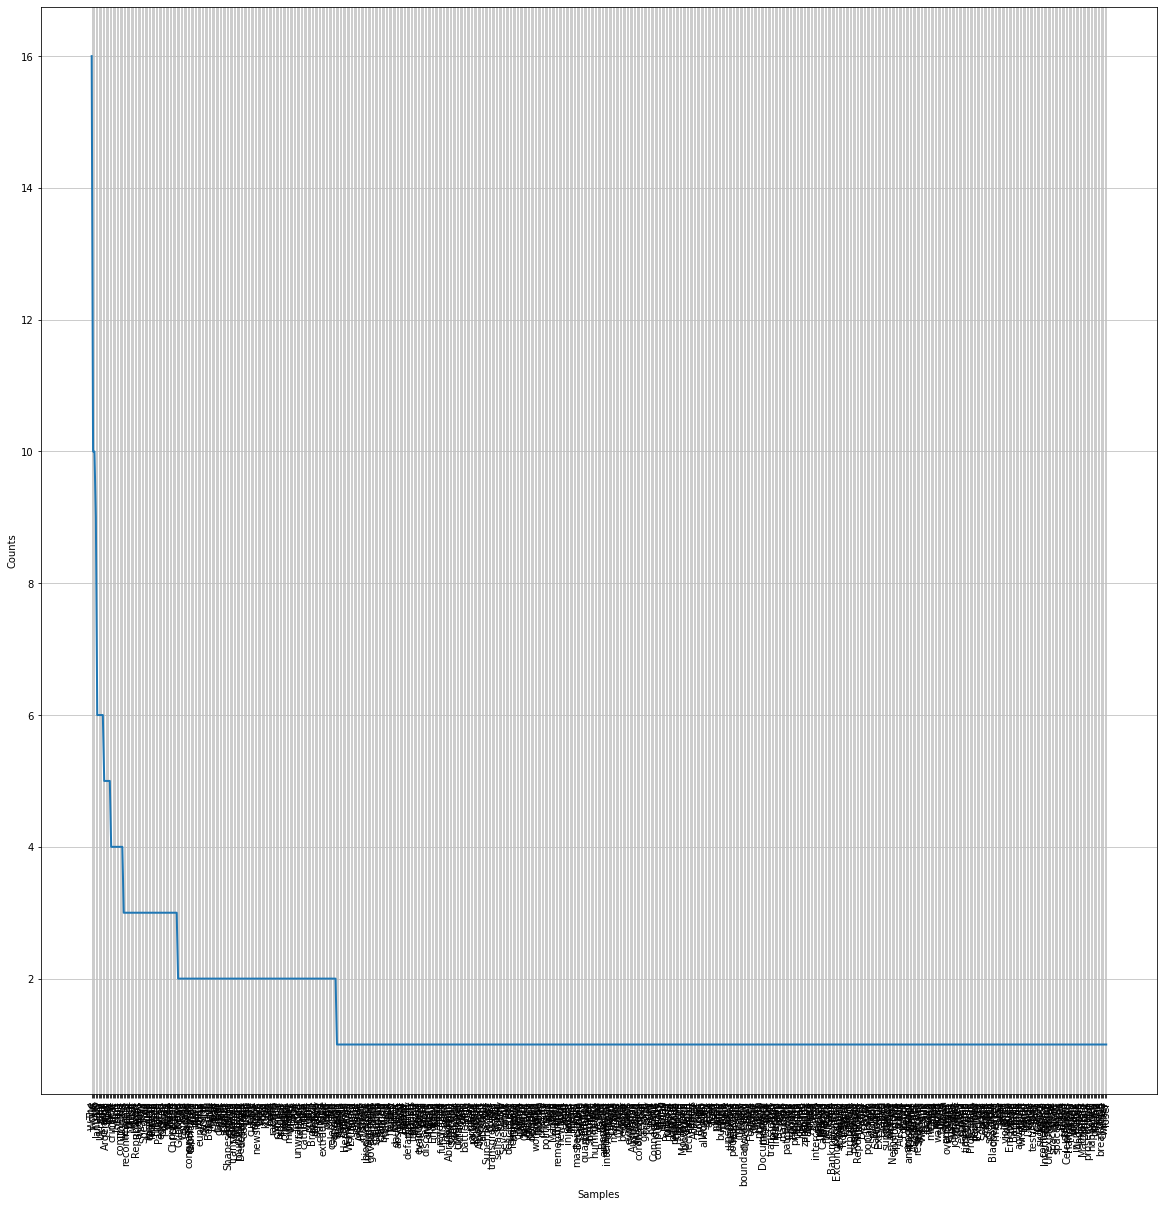

In [67]:
plotfreq(stem_tokens)

In [68]:
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
import os
import spacy
nlp = spacy.load('en_core_web_sm')
from textblob import TextBlob
from pattern.en import sentiment

In [1]:
clean_text= stem_tokens.replace("n", " ")
clean_text= clean_text.replace("/", " ")       
clean_text= ''.join([c for c in clean_text if c != "'"])

NameError: name 'nltk' is not defined

In [ ]:
sentence=[]
tokens = nlp(stem_tokens)
for sent in tokens.sents:
    sentence.append((sent.text.strip()))

In [ ]:
# Import the Naive Bayes Classification algorithm
from nltk.classify import NaiveBayesClassifier

# Import the subjectivity test corpus
from nltk.corpus import subjectivity

# Import the sentiment analysis libraries
from nltk.sentiment import SentimentAnalyzer

# Import the utilities library
from nltk.sentiment.util import *

from nltk.sentiment import SentimentAnalyzer

sentim_anl = SentimentAnalyzer()
all_words = sentim_anl.all_words([mark_negation(doc) for doc in stem_tokens])
all_words

In [ ]:
len(all_words)